In [ ]:
# This notebook will be analysing a dataset of 4998 movies having various fields like 
#     Title, Cast, Budget, Gross, IMDB Rating and more.

# Movies, part of entertainment industry are where we see a blend of Commerce and Arts. Year on Year we see big production
#     houses tussling over to get the best cast, best release dates so as to make big money, and parallely we see 
#    various artist collaborating to produce some amazing content which is ctirically acclaimed and appreciated.

# We believe the purpose of making moves can broadly be classified into two parts:
#     1) Make Big money. The box office gross of a movie can be a valid metric for this aspect.
#     2) Earn Recpect. Respect can be subjective but broadly critically acclaimed movies earns respect.
#        IMDB score can be used as a proxy for this.

# In this analysis we will be focusing on how various elements of a movie impacts Gross, and IMDB score of that movie.

In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [61]:
# Reading the csv file and cleaning data to prepare for further processing.

movies_data_file_name = "movie_metadata.csv"
movies = pd.read_csv(movies_data_file_name)
movies.drop_duplicates(inplace=True)
char_fields = ['color', 'director_name', 'actor_2_name','genres','actor_1_name','actor_3_name','movie_title','plot_keywords','movie_imdb_link','language','country']
for field in char_fields:
    movies[field].fillna(value="Not Available", inplace = True)
    movies[field] = movies[field].apply(str.strip)
print("Loaded total", len(movies), "movies and", len(list(movies)), "fileds.")

Loaded total 4998 movies and 28 fileds.


In [62]:
# Let's see all the fields we have to analyse
list(movies)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [63]:
#Lets Check Out the top 10 Grossing Movies
movies.sort_values(by='gross', ascending = False)[['movie_title','title_year']].head(10)

,movie_title,title_year
0,Avatar,2009.0
26,Titanic,1997.0
29,Jurassic World,2015.0
17,The Avengers,2012.0
66,The Dark Knight,2008.0
240,Star Wars: Episode I - The Phantom Menace,1999.0
3024,Star Wars: Episode IV - A New Hope,1977.0
8,Avengers: Age of Ultron,2015.0
3,The Dark Knight Rises,2012.0
582,Shrek 2,2004.0


In [64]:
# And the top rated movies
movies.sort_values(by='imdb_score', ascending = False)[['movie_title','title_year']].head(10)

,movie_title,title_year
2765,Towering Inferno,NaN
1937,The Shawshank Redemption,1994.0
3466,The Godfather,1972.0
3207,Dekalog,NaN
2824,Dekalog,NaN
4409,Kickboxer: Vengeance,2016.0
66,The Dark Knight,2008.0
3481,Fargo,NaN
2837,The Godfather: Part II,1974.0
1874,Schindler's List,1993.0


In [83]:
# Top Grossing Director
movies['director_gross'] = movies.groupby('director_name')['gross'].transform('sum')
movies['director_gross_average'] = movies.groupby('director_name')['gross'].transform('mean')
movies['director_movie_count'] = movies.groupby('director_name')['movie_title'].transform('count')


directors = movies.drop_duplicates(subset='director_name')
directors = directors[['director_name','director_movie_count', 'director_gross','director_gross_average']]
directors.rename(columns = {'director_name':'name','director_movie_count':'movies_count', 'director_gross':'total_gross','director_gross_average':'average_gross'}, inplace = True)
print("Top Grossing Directors: ")
print(directors.sort_values(by='total_gross', ascending = False).head(10))
print("Top Grossing (Average) Directors: ")
print(directors[directors['movies_count']>=3].sort_values(by="average_gross",ascending=False).head(10))




Top Grossing Directors: 
                  name  movies_count   total_gross  average_gross
54    Steven Spielberg            26  4.114233e+09   1.645693e+08
20       Peter Jackson            12  2.592969e+09   2.160808e+08
36         Michael Bay            13  2.231243e+09   1.716340e+08
33          Tim Burton            16  2.071275e+09   1.294547e+08
6            Sam Raimi            13  2.049549e+09   1.707958e+08
0        James Cameron             7  1.948126e+09   2.783037e+08
3    Christopher Nolan             8  1.813228e+09   2.266534e+08
236       George Lucas             5  1.741418e+09   3.482837e+08
61     Robert Zemeckis            13  1.619309e+09   1.245622e+08
202     Chris Columbus            11  1.618708e+09   1.471552e+08
Top Grossing (Average) Directors: 
                  name  movies_count   total_gross  average_gross
8          Joss Whedon             3  1.107607e+09   3.692024e+08
236       George Lucas             5  1.741418e+09   3.482837e+08
67         Pete 

In [84]:
# Top Grossing Actors
actors = movies[["actor_1_name",'gross']].rename(columns={'actor_1_name':'name'})
actors = actors.append(movies[["actor_2_name",'gross']].rename(columns={'actor_2_name':'name'}), ignore_index = True)
actors = actors.append(movies[["actor_3_name",'gross']].rename(columns={'actor_3_name':'name'}), ignore_index = True)
actors['total_gross'] = actors.groupby('name')['gross'].transform('sum')
actors['average_gross'] = actors.groupby('name')['gross'].transform('mean')
actors['movie_count'] = actors.groupby('name')['name'].transform('count')
actors.drop_duplicates(subset='name', inplace = True)
actors.drop(labels='gross', axis='columns', inplace = True)

print("Top Grossing Actors: ")
print(actors.sort_values(by='total_gross', ascending = False).head(10))
print("Top Grossing (Average) Actors: ")
print(actors[actors['movie_count']>=3].sort_values(by="average_gross",ascending=False).head(10))

Top Grossing Actors: 
                   name   total_gross  average_gross  movie_count
232      Morgan Freeman  3.938459e+09   8.951042e+07           47
1           Johnny Depp  3.688020e+09   9.456462e+07           40
43            Tom Hanks  3.612647e+09   1.290231e+08           28
79   Scarlett Johansson  3.607925e+09   1.244112e+08           29
27    Robert Downey Jr.  3.539261e+09   1.264022e+08           28
54        Harrison Ford  3.479593e+09   1.288738e+08           29
75           Tom Cruise  3.330289e+09   1.189389e+08           29
6          J.K. Simmons  2.856407e+09   9.214217e+07           31
19           Will Smith  2.793313e+09   1.396656e+08           20
182          Matt Damon  2.757020e+09   7.255316e+07           38
Top Grossing (Average) Actors: 
                    name   total_gross  average_gross  movie_count
7037         Kenny Baker  1.102585e+09   2.756464e+08            4
5018          Adam Brown  8.164650e+08   2.721550e+08            3
2433       Ian McDi

Kenny Bakes our very own R2D2 is the top actor with highest average gross.

In [69]:
# Gross v Rating
# Remove all NULL records and prepare a Scatter plot
df = movies.dropna(subset=['gross','imdb_score'])
fig = px.scatter(df,x='gross', y='imdb_score')
fig.show()

We see there are lot more movies packed in 0-100M bucket compared to movies with more than 500M gross.
Also we see as the gross increases imdb_score shifts towards 7 and 8, lets filter out movies above 500M gross.

In [70]:
df = movies[movies['gross']<=300000000].dropna(subset=['gross','imdb_score'])
fig = px.scatter(df,x='gross', y='imdb_score')
fig.show()

 As expected we can have similar observation: 
     "Movies with low imdb_score will fizzle out early and won't go on to gross big money".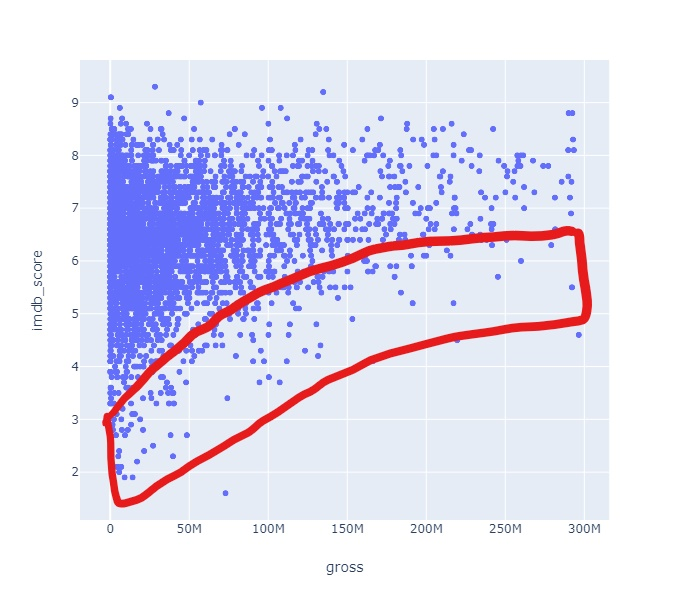

In [32]:
# # Bringing in the Budget field into analysis
# df = movies.dropna(subset=['gross','imdb_score','budget'])
# df = df[(df['gross']<=500000000) & (df['budget'] <= 200000000)]
# x= df['gross']
# y= df['imdb_score']
# z= df['budget']

# fig = px.line_3d(df, x="gross", y="budget", z="imdb_score")


# # fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color='rgba(244,22,100,0.6)')],
# #                layout = go.Layout( title="Gross v imdb_score v Budget",  scene={"xaxis": {'title': 'Gross'},
# #                          "yaxis": {"title": 'imdb_score'},
# #                          "zaxis":{"title": "Budget"}}))
# # fig.update_xaxes(title_text='Gross')
# # fig.update_yaxes(title_text='imdb_score')
# # fig.update_zaxes(title_text='Budget')

# fig.show()

In [71]:
# Lets get budget of the movie into analysis
print("Range of Budget: \nMax:",movies['budget'].max(),"\nMin:",movies['budget'].min())
print("Removing the top 12% and bottom 12% of outliers.")
q=movies['budget'].quantile([.12,.88])
df=movies[(movies['budget']>=q[.12]) & (movies['budget']<=q[.88])]
print("Range of Budget(outliers Removed): \nMax:",df['budget'].max(),"\nMin:",df['budget'].min())
print("Removing the top 12% and bottom 12% of outliers.")

Range of Budget: 
Max: 12215500000.0 
Min: 218.0
Removing the top 12% and bottom 12% of outliers.
Range of Budget(outliers Removed): 
Max: 75000000.0 
Min: 1950000.0
Removing the top 12% and bottom 12% of outliers.


Let concentrate now on the Gross. 
We will noe see does popularity affects the movie collection.
Popularity can be measured based on following fields:
* 'movie_facebook_likes'
* 'director_facebook_likes'
*  Sum of 'actor_n_facebook_likes'
* 'cast_total_facebook_like'
* 'num_user_reviews'
* 'num_critic_for_reviews'

These popularity indicators are relevant in present day but facebook was not there in 90's. So any movie comming out in 2010's have more chances of getting more likes than movies coming in 90's. Therefore these indicators  needs to be normalized based on the year movie was released. 

We will take 2015 as base year and appreciate these indicators of movies. 

In [164]:
for cols in list(movies):
    if cols[-4:]=="_adj":
        print(cols)
        movies.drop(labels=[cols], axis='columns', inplace = True)
movies.dropna(subset=['title_year'], inplace = True)
movies['decade'] = movies['title_year']/10
movies['decade'] = movies['decade'].astype(int, error = 'ignore')
movies['decade'] = movies['decade'] * 10
movies['decade_facebook_likes'] = movies.groupby('decade')['cast_total_facebook_likes'].transform("sum")
base_year_likes = movies[movies['decade']==2010]['decade_facebook_likes'].iloc[0]
movies['likes_adjustment_factor'] = movies['decade_facebook_likes'] / base_year_likes
likes_list = ['movie_facebook_likes']
for like_field in likes_list:
    movies[(like_field+"_adj")] = movies[like_field] / movies['likes_adjustment_factor']


movies['num_total_reviews'] = movies['num_user_for_reviews'] + movies['num_critic_for_reviews']
movies['decade_reviews'] = movies.groupby('decade')['num_total_reviews'].transform("sum")
base_year_reviews = movies[movies['title_year']==2015]['year_reviews'].iloc[0]
movies['reviews_adjustment_factor'] = movies['decade_reviews'] / base_year_reviews
reviews_list = ['num_user_for_reviews','num_critic_for_reviews']
for review_field in reviews_list:
    movies[(review_field + "_adj")] = movies[review_field] / movies['reviews_adjustment_factor']


movie_facebook_likes_adj
num_user_for_reviews_adj
num_critic_for_reviews_adj


In [168]:
def make_scatter_plot(df, field1, field2, field1_low = 0, field1_high = 0, field2_low = 0, field2_high =0, hover_label = 'movie_title'):
    if field1_low != 0:
        df = df[df[field1] >= field1_low]
    if field1_high !=0:
        df = df[df[field1] <= field1_high]
    if field2_low != 0:
        df = df[df[field2] >= field2_low]
    if field2_high !=0:
        df = df[df[field2] <= field2_high]
    df = df.dropna(subset=[field1,field2])
    fig = go.Figure(data = go.Scatter (x=df[field1], y=df[field2], mode='markers', text=df[hover_label]))
    fig.update_layout (title = (field1 + " v " + field2), xaxis_title = field1, yaxis_title = field2)
    fig.show()
    
def print_cast(df, movie_name):
    print("Movie:", movies[movies['movie_title']==movie_name]['movie_title'].iloc[0])
    print("Director:", movies[movies['movie_title']==movie_name]['director_name'].iloc[0])
    print("Actor 1:", movies[movies['movie_title']==movie_name]['actor_1_name'].iloc[0])
    print("Actor 2:", movies[movies['movie_title']==movie_name]['actor_2_name'].iloc[0])
    print("Actor 3:", movies[movies['movie_title']==movie_name]['actor_3_name'].iloc[0])
    print("Year:", movies[movies['movie_title']==movie_name]['title_year'].iloc[0])
    print("Gross:", movies[movies['movie_title']==movie_name]['gross'].iloc[0])
    print("IMDB:", movies[movies['movie_title']==movie_name]['imdb_score'].iloc[0])
    print("Duration:", movies[movies['movie_title']==movie_name]['duration'].iloc[0])

In [126]:
make_scatter_plot(movies, 'gross','movie_facebook_likes_adj', field1_high = 500000000, field2_high = 0, field1_low = 0)

There are a lot of movies with less likes and less gross. But there doesn't seem to be a pattern between like and gross

In [130]:
make_scatter_plot(movies, 'gross','director_facebook_likes', hover_label = 'movie_title', field1_high = 0, field2_high = 0, field1_low = 0)

Christopher Nolan with The Dark Knight is the best mix of popularity and Gross

In [132]:
make_scatter_plot(movies, 'gross','cast_total_facebook_likes', hover_label = 'movie_title', field1_high = 300000000, field2_high = 100000, field1_low = 0)

In [178]:
make_scatter_plot(movies[movies['country']=="USA"], 'gross','num_critic_for_reviews', hover_label = 'movie_title', field1_high = 0, field2_high = 200, field2_low = 100)

We limited total reviews to 200 to get a better picture. The number of reviews is generally more for pictures grossing more than 100M. The is logical as the movie picks up momentum on box office, it grabs more attention and hence more reviewers.

In [174]:
print_cast(movies,'Down for Life')

Movie: Down for Life
Director: Alan Jacobs
Actor 1: Snoop Dogg
Actor 2: Laz Alonso
Actor 3: Nicholas Gonzalez
Year: 2009.0
Gross: nan
IMDB: 7.3
Duration: 92.0


4891